In [ ]:
!pip install pandas
!pip install pyspark
!pip install pyexcel
!pip install pyexcel-ods
!pip install scikit-learn
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=ae72eefd2a8ef20307fd23e5347b0539654a9d758b11d4c206a2a2476fd849b3
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=d23389559c0ad5bd74598f5aad6ae87551b52631ecbfd28b3b9f4ae4f05dd775
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


Loading the Dataset

In [ ]:
import pyexcel as pe

pe.get_book(file_name="/content/prc-pfa-mar2013-onwards-tables-191023.ods").save_as("/content/crime_data.csv")

Merging the Dataset

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("crime_analysis").getOrCreate()

In [ ]:
file_paths = ['/content/crime_data/crime_data__2017-18__5.csv', '/content/crime_data/crime_data__2018-19__6.csv', '/content/crime_data/crime_data__2019-20__7.csv', '/content/crime_data/crime_data__2020-21__8.csv', '/content/crime_data/crime_data__2021-22__9.csv', '/content/crime_data/crime_data__2022-23__10.csv', '/content/crime_data/crime_data__2023-24__11.csv']
dfs = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

In [ ]:
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = merged_df.union(df)

In [ ]:
merged_df.show()

+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|Financial Year|Financial Quarter|       Force Name| Offence Description|       Offence Group|    Offence Subgroup|Offence Code|Number of Offences|
+--------------+-----------------+-----------------+--------------------+--------------------+--------------------+------------+------------------+
|       2017/18|                1|Avon and Somerset|Absconding from l...|Miscellaneous cri...|Miscellaneous cri...|          80|                 2|
|       2017/18|                1|Avon and Somerset|Abuse of children...|     Sexual offences|Other sexual offe...|          71|                 6|
|       2017/18|                1|Avon and Somerset|Abuse of position...|     Sexual offences|Other sexual offe...|          73|                 1|
|       2017/18|                1|Avon and Somerset|Aggravated Burgla...|      Theft offences|Non-domestic burg.

In [ ]:
!pip install matplotlib-venn
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt

Converting the Dataset to Pandas

In [ ]:
crime_df = merged_df.toPandas()

In [ ]:
crime_df

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2017/18,1.0,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,2.0
1,2017/18,1.0,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,6.0
2,2017/18,1.0,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,1.0
3,2017/18,1.0,Avon and Somerset,Aggravated Burglary Business and Community,Theft offences,Non-domestic burglary,31A,2.0
4,2017/18,1.0,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,0.0
...,...,...,...,...,...,...,...,...
147408,2023/24,1.0,Wiltshire,Wildlife,Miscellaneous crimes against society,Miscellaneous crimes against society,96,5.0
147409,2023/24,1.0,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,79986.0
147410,2023/24,1.0,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,81062.0
147411,2023/24,1.0,UK Finance,Fraud offences recorded by UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,117875.0


Cleaning the Dataset

In [ ]:
print(crime_df.describe())

       Financial Quarter  Number of Offences
count      147261.000000       147261.000000
mean            2.435003          256.527370
std             1.135392         1947.347636
min             1.000000           -2.000000
25%             1.000000            0.000000
50%             2.000000           12.000000
75%             3.000000          100.000000
max             4.000000       132693.000000


In [ ]:
print(crime_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147413 entries, 0 to 147412
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Financial Year       147261 non-null  object 
 1   Financial Quarter    147261 non-null  float64
 2   Force Name           147261 non-null  object 
 3   Offence Description  147261 non-null  object 
 4   Offence Group        147261 non-null  object 
 5   Offence Subgroup     147261 non-null  object 
 6   Offence Code         147261 non-null  object 
 7   Number of Offences   147261 non-null  float64
dtypes: float64(2), object(6)
memory usage: 9.0+ MB
None


In [ ]:
crime_df.isnull().sum()

Financial Year         152
Financial Quarter      152
Force Name             152
Offence Description    152
Offence Group          152
Offence Subgroup       152
Offence Code           152
Number of Offences     152
dtype: int64

In [ ]:
crime_df_cleaned = crime_df.dropna()

print(crime_df_cleaned)

       Financial Year  Financial Quarter         Force Name  \
0             2017/18                1.0  Avon and Somerset   
1             2017/18                1.0  Avon and Somerset   
2             2017/18                1.0  Avon and Somerset   
3             2017/18                1.0  Avon and Somerset   
4             2017/18                1.0  Avon and Somerset   
...               ...                ...                ...   
147407        2023/24                1.0          Wiltshire   
147408        2023/24                1.0          Wiltshire   
147409        2023/24                1.0       Action Fraud   
147410        2023/24                1.0              CIFAS   
147411        2023/24                1.0         UK Finance   

                                      Offence Description  \
0                          Absconding from lawful custody   
1           Abuse of children through sexual exploitation   
2           Abuse of position of trust of a sexual nature   

In [ ]:
crime_df_cleaned.isnull().sum()

Financial Year         0
Financial Quarter      0
Force Name             0
Offence Description    0
Offence Group          0
Offence Subgroup       0
Offence Code           0
Number of Offences     0
dtype: int64

In [ ]:
crime_df_cleaned.duplicated().sum()

0

In [ ]:
crime_df_cleaned

,Financial Year,Financial Quarter,Force Name,Offence Description,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2017/18,1.0,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,2.0
1,2017/18,1.0,Avon and Somerset,Abuse of children through sexual exploitation,Sexual offences,Other sexual offences,71,6.0
2,2017/18,1.0,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,1.0
3,2017/18,1.0,Avon and Somerset,Aggravated Burglary Business and Community,Theft offences,Non-domestic burglary,31A,2.0
4,2017/18,1.0,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary,31,0.0
...,...,...,...,...,...,...,...,...
147407,2023/24,1.0,Wiltshire,Violent disorder,Public order offences,Public order offences,62A,0.0
147408,2023/24,1.0,Wiltshire,Wildlife,Miscellaneous crimes against society,Miscellaneous crimes against society,96,5.0
147409,2023/24,1.0,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,79986.0
147410,2023/24,1.0,CIFAS,Fraud offences recorded by CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,81062.0


In [ ]:
pe.get_book(file_name="/content/reccrime-offence-ref.ods").save_as("/content/offence_reference.csv")

In [ ]:
offence_ref = pd.read_csv('/content/offence_reference.csv')
offence_ref.head()

,Offence Code,Offence description,Old PRC offence group,Old offence sub-group,New ONS offence group,New ONS sub-offence group
0,1,Murder,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
1,1/4.1/4.2,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
2,1/4.1/4.2/4.10,Homicide,Violence against the person,Violence against the person - with injury,Violence against the person,Homicide
3,104,Assault without injury on a constable,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury
4,105A,Assault without injury,Violence against the person,Violence against the person - without injury,Violence against the person,Violence without injury


In [ ]:
print(crime_df_cleaned.dtypes)

Financial Year          object
Financial Quarter      float64
Force Name              object
Offence Description     object
Offence Group           object
Offence Subgroup        object
Offence Code            object
Number of Offences     float64
dtype: object


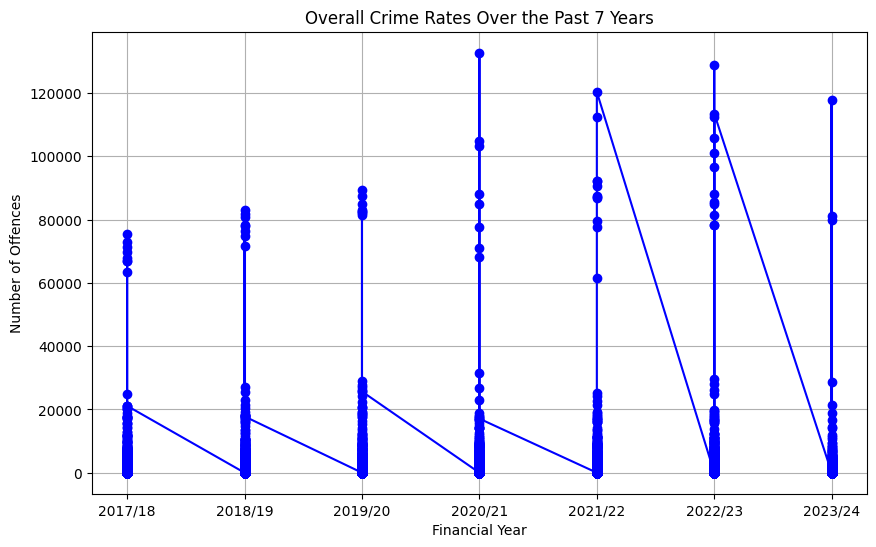

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(crime_df_cleaned['Financial Year'], crime_df_cleaned['Number of Offences'], marker='o', linestyle='-', color='b')
plt.title('Overall Crime Rates Over the Past 7 Years')
plt.xlabel('Financial Year')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.show()


In [ ]:
pip install seaborn statsmodels

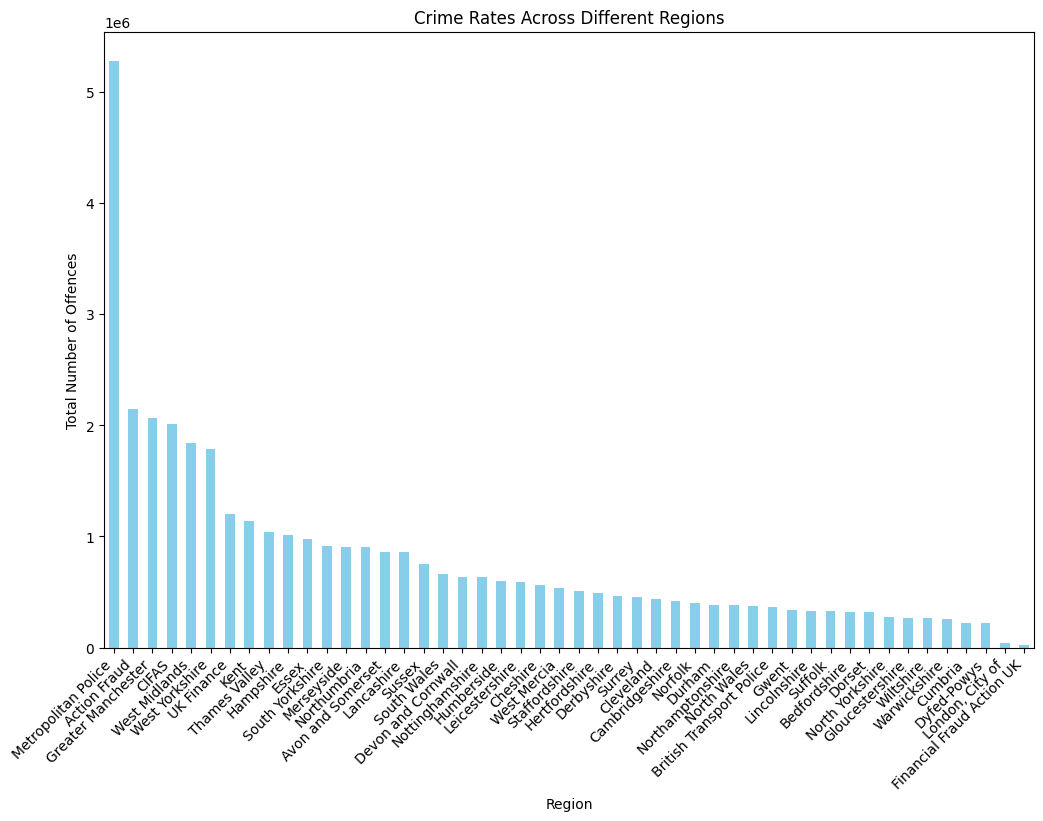

In [ ]:
crime_data_grouped = crime_df_cleaned.groupby('Force Name')['Number of Offences'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
crime_data_grouped.plot(kind='bar', color='skyblue')
plt.title('Crime Rates Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Number of Offences')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
crime_df_cleaned.columns

Index(['Financial Quarter', 'Force Name', 'Offence Description',
       'Offence Group', 'Offence Subgroup', 'Offence Code',
       'Number of Offences'],
      dtype='object')

In [ ]:
crime_frequency_over_time = crime_df_cleaned.groupby(['Financial Year', 'Offence Description'])['Number of Offences'].sum().reset_index()

print(crime_frequency_over_time.head())


  Financial Year                            Offence Description  \
0        2017/18                 Absconding from lawful custody   
1        2017/18  Abuse of children through sexual exploitation   
2        2017/18  Abuse of position of trust of a sexual nature   
3        2017/18     Aggravated Burglary Business and Community   
4        2017/18                Aggravated Burglary Residential   

   Number of Offences  
0               797.0  
1              1057.0  
2               285.0  
3               358.0  
4              3174.0  


In [ ]:
merged_data = pd.merge(crime_df_cleaned, offence_ref, on='Offence Code', how='left')


In [ ]:
merged_data['Financial Year'] = pd.to_datetime(merged_data['Financial Year'].str.split('/').str[0], format='%Y')
merged_data['Quarter'] = merged_data['Financial Quarter']

In [ ]:
quarterly_crime = merged_data.groupby(['Quarter', 'Offence Code'])['Number of Offences'].sum().reset_index()

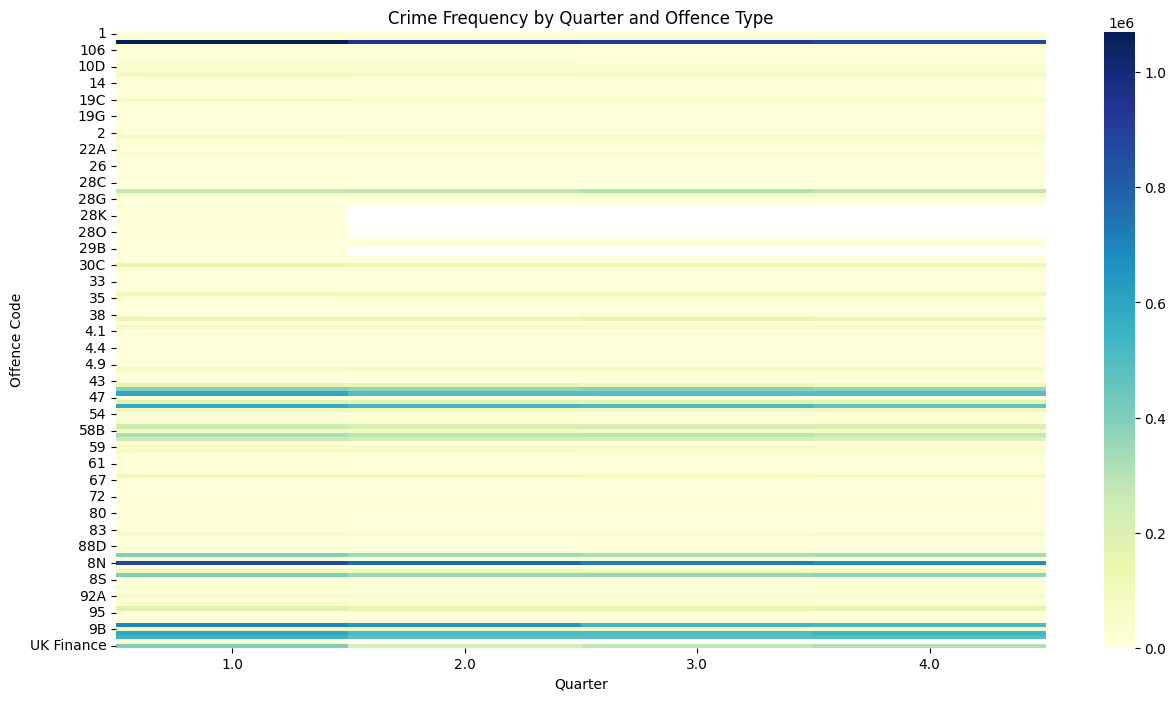

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(quarterly_crime.pivot_table(index='Offence Code', columns='Quarter', values='Number of Offences', aggfunc='sum'), cmap='YlGnBu')
plt.title('Crime Frequency by Quarter and Offence Type')
plt.show()

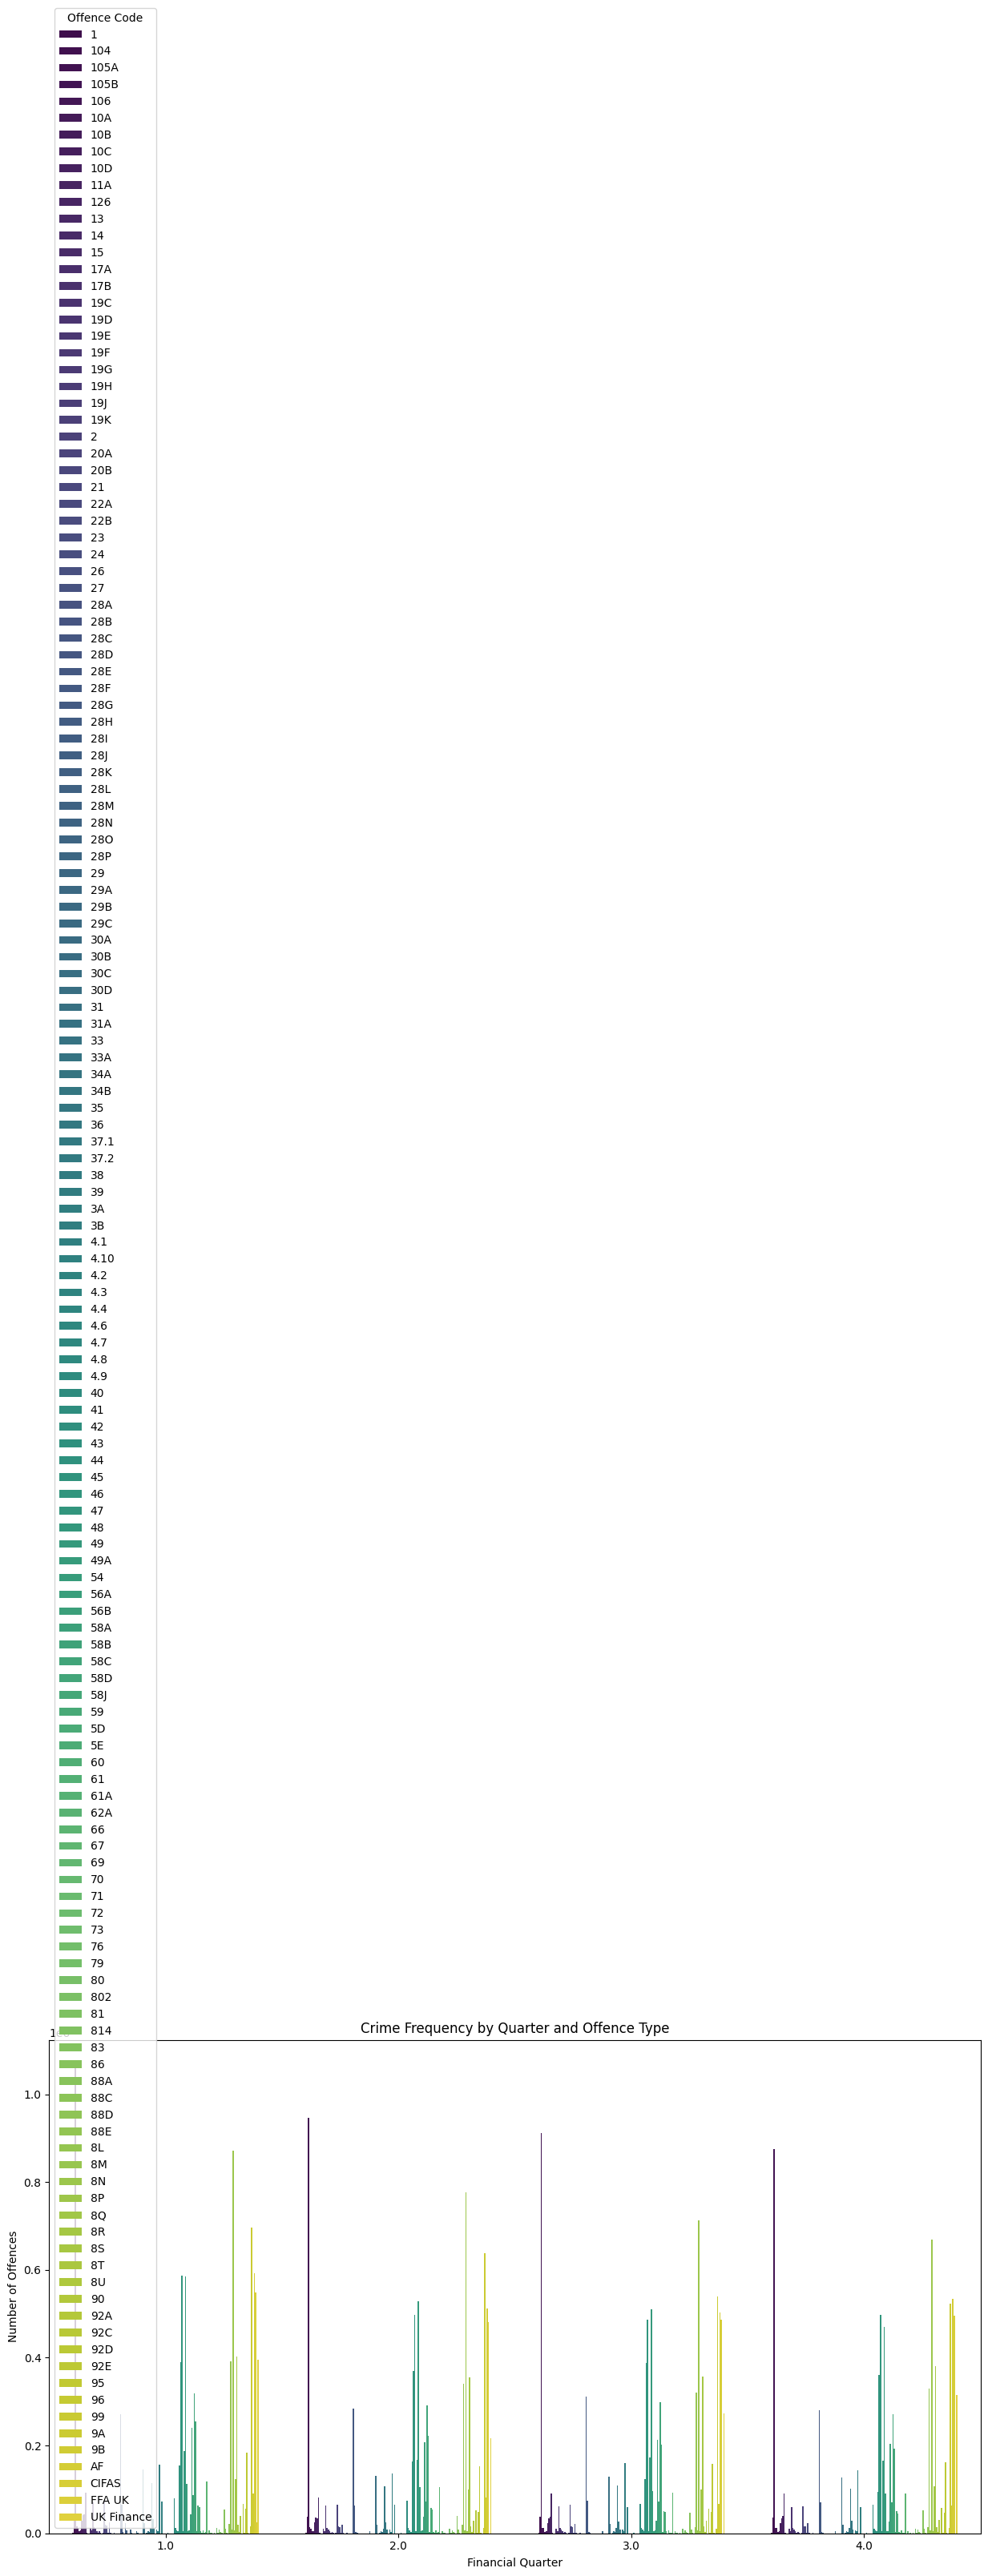

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Quarter', y='Number of Offences', hue='Offence Code', data=quarterly_crime, palette='viridis')
plt.title('Crime Frequency by Quarter and Offence Type')
plt.xlabel('Financial Quarter')
plt.ylabel('Number of Offences')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = crime_df_cleaned[['Financial Year', 'Financial Quarter', 'Force Name', 'Number of Offences']]
y = crime_df_cleaned['Offence Group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
crime_df_cleaned.loc[:,'Financial Year'] = label_encoder.fit_transform(crime_df_cleaned['Financial Year'])
crime_df_cleaned.loc[:,'Financial Quarter'] = label_encoder.fit_transform(crime_df_cleaned['Force Name'])
crime_df_cleaned.loc[:,'Force Name'] = label_encoder.fit_transform(crime_df_cleaned['Force Name'])
crime_df_cleaned.loc[:,'Offence Group'] = label_encoder.fit_transform(crime_df_cleaned['Offence Group'])

<ipython-input-30-63817a607c9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df_cleaned.loc[:,'Financial Year'] = label_encoder.fit_transform(crime_df_cleaned['Financial Year'])
<ipython-input-30-63817a607c9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_df_cleaned.loc[:,'Financial Quarter'] = label_encoder.fit_transform(crime_df_cleaned['Force Name'])
<ipython-input-30-63817a607c9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

ValueError: could not convert string to float: '2020/21'

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

Accuracy: 0.927919057481411


In [ ]:
mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5890741180864428


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_LR = linear_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_LR)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9679723517288907


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_DT = DT_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9354564900010186


In [ ]:
mse = mean_squared_error(y_test, y_pred_DT)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.6229925644246767


In [ ]:
from sklearn import metrics

rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
lr_mse = metrics.mean_squared_error(y_test, y_pred_LR)
dt_mse = metrics.mean_squared_error(y_test, y_pred_DT)

In [ ]:
models = ['RF', 'LR', 'DT']
mse = [rf_mse, lr_mse, dt_mse]

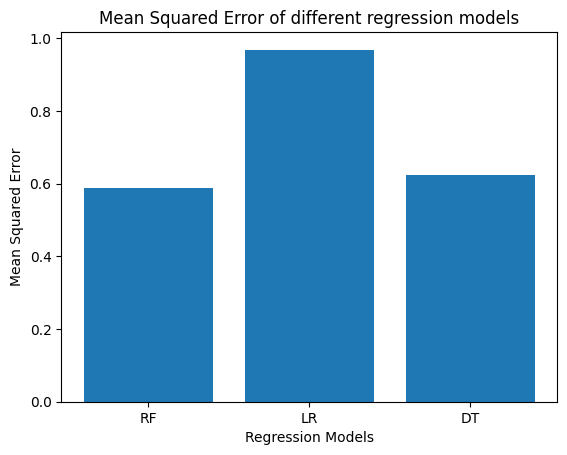

In [ ]:
import matplotlib.pyplot as plt

plt.bar(models, mse)
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of different regression models')
plt.show()

In [ ]:
merged_data.to_excel('merged_data.xlsx', index=False)

In [ ]:
crime_df_cleaned.to_csv('crime_df_cleaned.csv', index=False)

In [ ]:
from pyspark.sql.functions import col, sum, count, avg, desc
from pyspark.sql.window import Window
from pyspark.sql import functions as F

In [ ]:
crime_df_cleaned_spark = spark.createDataFrame(crime_df_cleaned)

In [ ]:
mapped_crime_df = crime_df_cleaned_spark.select('Offence Group', 'Number of Offences').rdd \
          .map(lambda row: (row['Offence Group'], row['Number of Offences']))

In [ ]:
reduced_crime_df = mapped_crime_df.reduceByKey(lambda x, y: x + y)

In [ ]:
mapReduce_result = reduced_crime_df.toDF(['Offence Group', 'Total Offences']).orderBy('Total Offences')
mapReduce_result.toPandas()

,Offence Group,Total Offences
0,Possession of weapons offences,299926.0
1,Robbery,474912.0
2,Miscellaneous crimes against society,681158.0
3,Sexual offences,1065594.0
4,Drug offences,1090695.0
5,Public order offences,3113583.0
6,Criminal damage and arson,3396193.0
7,Fraud offences,5381019.0
8,Theft offences,10918454.0
9,Violence against the person,11354943.0
